# **Modern Theory of Detection and Estimation**
## **Lab 1. Machine Learning for Regression**
### **Academic Year 2023/2024**

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (groups 61 and 65)
*   Sound and Image Engineering (groups 66 and 69)
*   Telecomunication Technologies Engineering (groups 91, 92 and 95)
*   Telematics Engineering (groups 71 and 79)

Signal Theory and Communications Department.



# **Logistics**


**Setup Instructions**

You will need the files found at Aula Global (in the master group). Please download the files over to your own private folder. Navigate to the folder where you copied the files to, and the folder should contain "Lab_regression_student_23_24.ipynb" and "data_lab_reg.csv". Open Google Colab and upload the notebook. Sometimes it will take a minute or so for a new Jupyter server to start up on your behalf. Once it does, you are ready to start!

In the notebook, you will clearly see where you need to add code for the different problems or write an answer to a question.


#**Objective**

Nowadays, rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

Your neighbor Haruto wants to start his own bike rental business in Tokyo (Japan) and wants some help predicting the number of bikes required at each hour for the stable supply of rental bikes. It would be great if you could somehow create a model that allows him to put in a few (climate) features and returns an estimate of the number of bikes that would rented each hour.

Haruto has asked you if you could help him out with your new data science skills. You say yes, and decide that implementing some regression models might be a good path to solve this problem!

Your neighbor then gives you some information about the weather conditions (temperature, humidity, windspeed, snowfall, etc.) and the number of bikes rented per hour in Seoul (South Korea).

**Let's get started!**


Let's get our environment ready with the necessary libraries and then import the data!


In [ ]:
#Import the Python libraries that are used in this lab assignment
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# <font color = 'black'> 1. Seoul bike sharing demand dataset </font>

## 1.1 Description

We will take the Seoul bike sharing demand dataset, which contains information about the number of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. The dataset presents the company's data between **December 1, 2017 and finishes one year later**. The goal is to facilitate the commute in the Seoul and reduce the amount of cars and the pollution.



This dataset is a reduced version of the original one that has been taken from the [UCI repository](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand). The objective is to estimate the number of rented bikes in a date (column `Rented Bike Count`).


### Getting the data

Let's start uploading the dataset from the local drive. In the next code cell, just click on "Choose Files" (or "Elegir archivos"), then select the file "data_lab_reg.csv" and upload it.

Wait for the file to be 100% uploaded (100% done!).

Note: You should see the name of the file once Goole Colab has uploaded it.

In [ ]:
#Importing the dataset
from google.colab import files

uploaded = files.upload()

Saving data_lab_reg.csv to data_lab_reg (1).csv


In [ ]:
#Read the csv file into a DataFrame called Data
Data = pd.read_csv('data_lab_reg.csv',
                   header=0,
                   dtype={'Rented Bike Count': int,
                          'Hour':int,'Temperature(C)':float,
                          'Humidity(%)':float,
                          'Wind speed (m/s)':float,
                          'Visibility (10m)':float,
                          'Dew point temperature(C)':float,
                          'Solar Radiation (MJ/m2)':float,
                          'Rainfall(mm)':float,
                          'Snowfall (cm)':float})

Data is now a DataFrame. Let's have a look at the information it contains!

In [ ]:
display(Data)

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1243,1026,19,5.2,48.0,1.9,1590.0,-4.9,0.0,0.0,0.0
1244,818,20,4.1,54.0,1.3,1434.0,-4.3,0.0,0.0,0.0
1245,792,21,3.8,55.0,2.1,1231.0,-4.4,0.0,0.0,0.0
1246,726,22,3.0,59.0,1.1,1218.0,-4.2,0.0,0.0,0.0


As it can been observed, there are $1248$ samples (or observations) and each one corresponds to $10$ variables (or features). The corresponding **target** is the number of **rented bikes in a date** (column `Rented Bike Count`).

The variables that form each observation are:

*   `Rented Bike Count`: Count of bikes rented at each hour.
*   `Hour`: Hour of the day (a number between $0$ and $23$).
*   `Temperature(C)`: In Celsius (ºC)
*   `Humidity(%)`: It is the humidity in the air (in %)
*   `Wind speed (m/s)`: In m/s.
*   `Visibility (10m)`: 10 m (it is the distance to see and identify).
*   `Dew point temperature(C)`: Temperature at the beggining of the day in Celsius (ºC)
*   `Solar Radiation (MJ/m2)`: Sun contribution. It is measured in MJ/$\text{m}^2$
*   `Rainfall(mm)`: It is the amount of rain in mm
*   `Snowfall (cm)`: It is the amount of snow in cm


It is easy to observe that all the abovementioned **features** are **numerical values** (integer number or floating-point numbers)!

In [ ]:
Data.dtypes

Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                 float64
Wind speed (m/s)            float64
Visibility (10m)            float64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
dtype: object

Here is the statistical description of the numerical features.

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,1248.0,743.803686,640.109054,2.0,234.500,579.00,1105.00,3418.00
Hour,1248.0,11.500000,6.924962,0.0,5.750,11.50,17.25,23.00
Temperature(C),1248.0,13.234535,12.492233,-16.4,2.675,15.05,22.80,37.90
Humidity(%),1248.0,58.207532,19.913471,14.0,42.750,57.00,72.00,98.00
Wind speed (m/s),1248.0,1.715865,0.997192,0.0,1.000,1.50,2.30,7.40
Visibility (10m),1248.0,1472.190705,573.151777,91.0,1046.750,1695.00,2000.00,2000.00
Dew point temperature(C),1248.0,4.438702,13.555036,-29.6,-4.800,6.20,15.80,25.50
Solar Radiation (MJ/m2),1248.0,0.558814,0.863956,0.0,0.000,0.01,0.91,3.45
Rainfall(mm),1248.0,0.192788,1.354607,0.0,0.000,0.00,0.00,21.50
Snowfall (cm),1248.0,0.068590,0.385575,0.0,0.000,0.00,0.00,4.30


In [ ]:
# Getting the column names!
feature_names = Data.columns.values[1:].tolist()

## 1.2 Data preparation

### 1.2.1 Preparing the data ($X$) and the target ($y$)

Create the matrix for data ($X$) and the targets ($y$). $X$ represents the observed data and $y$ is a vector that contains the desired values (actual or correct values) that we are trying to predict (usually called "targets" or "labels"). In this assignment, the targets are the values in column `Rented Bike Count`. So, $y$ is a one-dimensional array of length equal to the number of samples.

The dimension of $X$ is $1248\times9$, where the number of rows corresponds to the number of observations and the number of columns represent the features. Note that the features in this assignment are the columns:
*  `Hour`
*  `Temperature(C)`
*  `Humidity(%)`
*  `Wind speed (m/s)`
*  `Visibility (10m)`
*  `Dew point temperature(C)`
*  `Solar Radiation (MJ/m2)`
*  `Rainfall(mm)`
*  `Snowfall (cm)`

In [ ]:
# Let's obtain the data (X) and the targets (y)
X = Data.loc[:,Data.columns[1:10]].values
y = Data.loc[:,Data.columns[0]].values

Let's check out that everything is OK. How many samples are there in the dataset? Print it out!

In [ ]:
#YOUR CODE HERE
print(X.shape[0])   #como leer una columna


1248


What is the number of features per sample? Print it out!

In [ ]:
#YOUR CODE HERE
print(X.shape[1])       #solo se puede sacar de X

9


### 1.2.2 Training, validation and test sets

Splitting the dataset $([X,y])$ is essential for an unbiased evaluation of the prediction performance. In most cases, it is enough to split the dataset randomly into three subsets:
*   The **training set** is applied to train, or **fit**, the model. For example, it can be used to find the optimal weights (or coefficients) for linear regression, etc.
*   The **validation set** is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal value of `alpha` in a Ridge regressor or the best `kernel` for the Kernel Ridge regression, you experiment with different values or different types of kernels. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

*   The **test set** is needed for an unbiased evaluation of the final model. It shouldn't be used for fitting or validation tasks.

The sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this work for you!

**Note:** When comparing machine learning algorithms, it is desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. In the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, this can be reached by setting the `random_state` to a specific integer value.

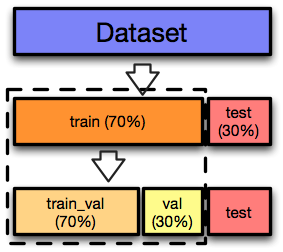

Split your **data** into **training** and **testing** (70/30) is indeed a good starting point!

For simplicity, use the names `X_train`, `X_test`, `y_train`, and `y_test` for the corresponding Numpy arrays.

$\underline{\text{Note}}$: Set `random_state` to a fixed value, for example, 42.

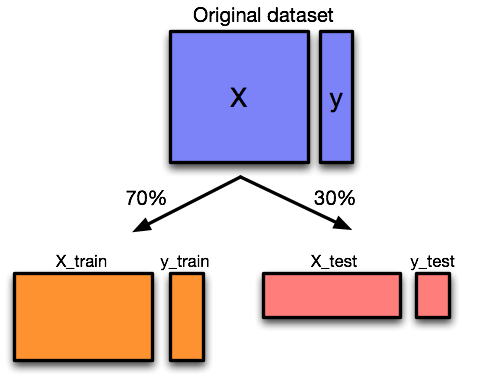

In [ ]:
#Split your data into training and testing (70/30) is indeed a good starting point!)
#For simplicity, use the names X_train, X_test, y_train, and y_test for the corresponding numpy arrays.
#Note: Set random_state to a fixed value, for example, 42
#YOUR CODE HERE
#necesitamos dividir el X_test para comprobar si funciona bien(con el error y eso)

from sklearn.model_selection import train_test_split #Importamos train_test_split de sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) #Entrenamos X e y ; y ponemos el tamaño del test al 30% y el random state a 42







How many samples are there in both train and test sets? Print it out!

In [ ]:
#YOUR CODE HERE
#Utilizamos la función train_test_split
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(873, 9)
(375, 9)
(873,)
(375,)


Now, split your **training data** ([`X_train`, `y_train`]) into two subsets: **train_val** and **val** (70/30).
For simplicity, use the names `X_train_val`, `X_val`, `y_train_val`, and `y_val` for the corresponding Numpy arrays.


$\underline{\text{Note}}$: Again, set `random_state` to a fixed value, for example, 42.

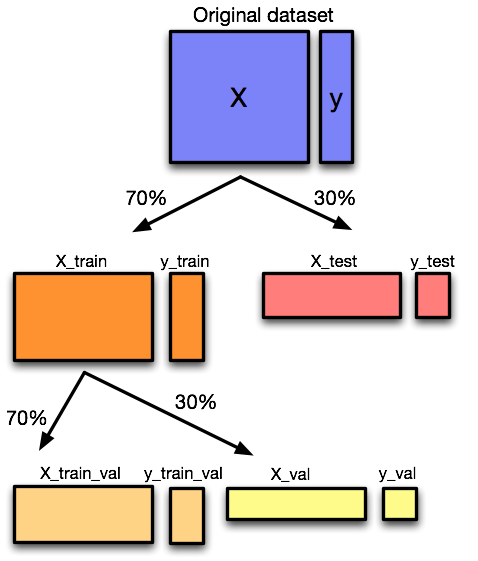

In [ ]:
#YOUR CODE HERE
  ##los hiperparametros de los regresores no añaden un peso de penalizazion , estos hiperparametros son positivos y tenemos que fijarlos antes de entrenar el regresor
  ##calculamos el mejor valor de los hiperparametro con X_train_val dando valore.
X_train_val, X_val , y_train_val, y_val =train_test_split(X_train,y_train,test_size=0.3,random_state = 42)



How many samples are there in training, validation, and test subsets, respectively?

In [ ]:
#YOUR CODE HERE
print(X_train_val.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

611
262
375


Please, check that the total number of samples is $1248$!

In [ ]:
#YOUR CODE HERE
print(X_train_val.shape[0]+X_val.shape[0]+X_test.shape[0])


1248


At this moment, there are avaible $3$ subsets for implementing the regression models:
*   `[X_train_val, y_train_val]`
*   `[X_val, y_val]`
*   `[X_test, y_test]`

# <font color = 'black'> 2. Modeling </font>

## 2.1 Regression evaluation metrics

Here are two common evaluation metrics for regression problems:

1)   **Coefficiente $R^2$** indicates the proportion of the variance in the estimated variable ($\hat{y}$) that can be explained by the observed variables. It can be computed as follows:

$$
R^2 = 1-\frac{\sum\limits_{i=1}^{N_t}{(y_i-\hat{y}_i)^2}}{\sum\limits_{i=1}^{N_t}{(y_i-\bar{y})^2}}
$$where:

* $N_t$ is the number of samples in the set.
* $\hat{y}_i$, $\,\,i=1,\dots,N_t\,$ are the estimated values (or estimations) made by the regressor for each $i$-th sample in the set.
* $y_i$, $\,\,i=1,\dots,N_t\,$ are the correct targets for each $i$-th sample in the set.
*$\bar{y}=\frac{1}{N_t}\sum\limits_{i=1}^{N_t}y_i\,$ is the average of the true targets for the samples in the set.

$R^2$ takes a maximum value of $1.0$ when the model makes an exact estimation of all the targets. The value of $R^2$ decreases as the estimation errors increase.

If the model is not perfect ($R^2=0$) but better than the trivial one, then $0 < R^2 < 1$. If $R^2$ falls below $0$ and takes negative values, it means that the estimation outputs by the model are worse than using the mean (trivial estimation).

In Python, there are several ways of calculating this coefficient:

  *   Using the function `r2_score` from the `sklearn.metrics` module.
  *   Using the `score()` method available in each (regression) model.


2)  **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\text{RMSE} = \sqrt{\frac 1K\sum_{i=k}^k\Big(y^{(k)}-\hat{y}^{(k)}\Big)^2}$$

The lower the RMSE, the better a model fits a set.

In Python, this error can be calculated by using the function `mean_squared_error` from `sklearn.metrics`, with the parameter `squared` equal to `False`.



## 2.2 Standardization of features
The ranges of variation of the variables conforming to the observations can be very different. Therefore, a typical pre-processing operation consists of normalizing the input variables so that they have comparable ranges.

Perhaps the most used scaling within the machine learning community is standardization. It consists of a linear transformation that leaves each variable with zero mean and unit variance. The idea is to transform every variable in every observation by subtracting its mean and dividing by its standard deviation.

The model [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) of `Scikit-learn` can perform this job for you!


For this purpose, perform the following operations:
*  Create an instance of `StandardScaler`.
*  Fit the scaler with the training data (`X_train_val`).
*  Create three new matrices:
    - `X_train_s`: It contains the result of transforming `X_train_val` with the scaler.
    - `X_val_s`: It contains the result of transforming `X_val` with the scaler.
    - `X_test_s`: It contains the result of transforming `X_test` with the scaler.


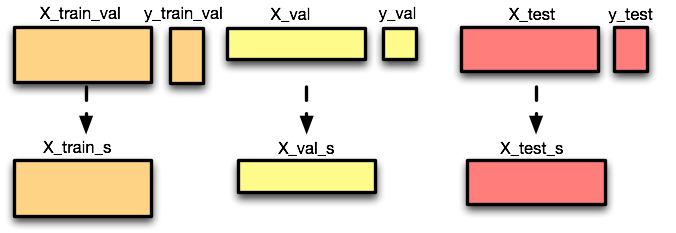

In [ ]:
#YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train_val)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)



In [ ]:
#Let's check out that everything is ok!
print('TRAINING SET')
print('Mean of each feature: ', np.round(np.mean(X_train_s,0),2))
print('Std of each feature: ', np.round(np.std(X_train_s,0),2))
print('\nVALIDATION SET')
print('Mean of each feature: ', np.round(np.mean(X_val_s,0),2))
print('Std of each feature: ', np.round(np.std(X_val_s,0),2))
print('\nTEST SET')
print('Mean of each feature: ', np.round(np.mean(X_test_s,0),2))
print('Std of each feature: ', np.round(np.std(X_test_s,0),2))

TRAINING SET
Mean of each feature:  [-0. -0. -0.  0. -0. -0.  0.  0.  0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]

VALIDATION SET
Mean of each feature:  [-0.11 -0.11  0.12 -0.04 -0.06 -0.03 -0.13  0.1   0.02]
Std of each feature:  [1.05 0.96 0.95 1.08 1.01 0.98 0.92 1.48 1.04]

TEST SET
Mean of each feature:  [-0.05 -0.04  0.06  0.02 -0.03 -0.   -0.06  0.12 -0.02]
Std of each feature:  [0.99 1.   1.02 1.03 1.   1.03 0.95 1.34 0.91]


From now on, please work with **standardized features**. In other words, the $3$ subsets for implementing the regression models are:
*   `[X_train_s, y_train_val]`
*   `[X_val_s, y_val]`
*   `[X_test_s, y_test]`



## 2.3 Designing the estimation models

### 2.3.1 Linear regression

> **Training the model**

*   First, import the package: `from sklearn.linear_model import LinearRegression`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
The variety of methods and attributes available for regression are shown [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_s,y_train_val)


> **Prediction from our model**

Let's grab predictions off our test set and see how well it did!

In [ ]:
#YOUR CODE HERE
lr_pred = lr.predict(X_test_s)
print(lr_pred.shape)



(375,)


> **Evaluation the model**

Let's evaluate the model by computing the $R^2$ and RMSE metrics and print out the results. Please, round any number off to 2 places.

In [ ]:
#YOUR CODE HERE
from sklearn.metrics import mean_squared_error

r2_linear=lr.score(X_test_s, y_test)
rmse_lr = round(mean_squared_error(y_test, lr_pred,squared=False),2)

print("RMSE:", rmse_lr)
print("R2:", r2_linear)

RMSE: 500.73
R2: 0.4713763567457383


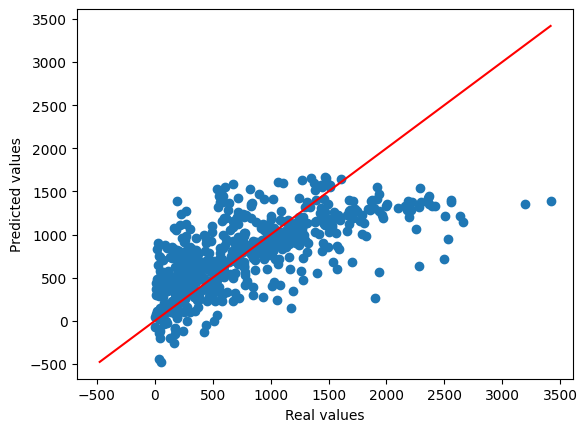

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs. the estimated value obtained for the training set.
s_train_lr = lr.predict(X_train_s)
plt.scatter(y_train_val,s_train_lr)
p1 = max(max(s_train_lr), max(y_train_val))
p2 = min(min(s_train_lr), min(y_train_val))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

Having a look at the scatter plot, are there outliers in the dataset? Justify your answer.

$\underline{\text{Note}}$: An outlier is a sample or observation that is an abnormal distance from other samples. In other words, it is data that lies outside the other values in the set.
If you had Pinocchio in a class of children, the length of his nose compared to the other children, would be an outlier.


<font color = 'green'> YOUR ANSWER HERE


###2.3.2 Linear Ridge Regression

> **Selecting the best value of alpha ($\alpha$)**

The first task here is to obtain a reasonable value of `alpha` for the linear Ridge regressor. In this assignment, the corresponding range that will be explored for `alpha` is: `[1e-5, 1e-4, 0.001, 0.01, 0.1,  1, 10, 100, 200]`. For each value of `alpha`, compute the $R^2$ for the validation set and plot all the metrics in the same figure.

*   First, import the package: `from sklearn.linear_model import Ridge`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
*   Then, compute the $R^2$ for the validation data and keep it in a 1D array and plot it in a figure! Please,  use log-scale in x-axis.


In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge

alpha = [1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 200]
results= np.zeros(len(alpha))

for i in range(len(alpha)):
 R= Ridge(alpha[i]).fit(X_train_s,y_train_val)
 #R_pre = R.predict(X_val_s)
 results[i] = R.score(X_val_s,y_val)
print(results)




[0.48234776 0.48234766 0.48234669 0.48233703 0.48224322 0.48151475
 0.47853162 0.45975532 0.44142167]


What is the best value for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

<function matplotlib.pyplot.show(close=None, block=None)>

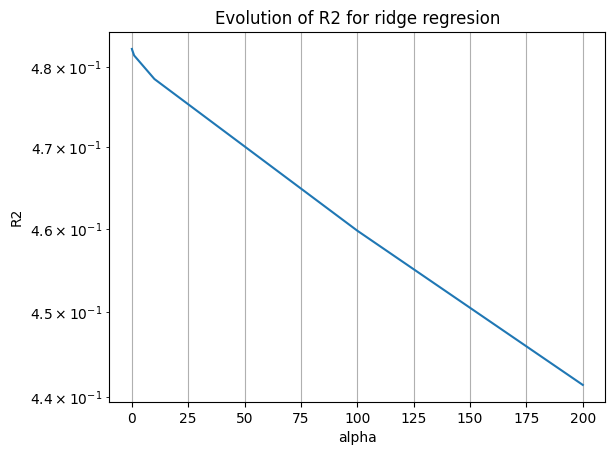

In [ ]:
# YOUR CODE HERE
plt.figure()
plt.plot(alpha,results)
plt.title('Evolution of R2 for ridge regresion')
plt.ylabel('R2')
plt.xlabel('alpha')
plt.yscale('log')
plt.grid()
plt.show


#the best value for alpha in the Ridge regressor is:1e-5

> **Training and evaluating the model**

*   Now, create a model object.
*   Next, fit the training data with the best value of alpha.
*   Let us evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge

alpha =1e-5
ridge_best= Ridge(alpha).fit(X_train_s,y_train_val)
ridge_pred = ridge_best.predict(X_test_s)


r2_ridge=ridge_best.score(X_test_s, y_test)
rmse_R = round(mean_squared_error(y_test, ridge_pred,squared=False),2)

print("RMSE:", rmse_R)
print("R2:", r2_ridge)


RMSE: 500.73
R2: 0.47137635442381476


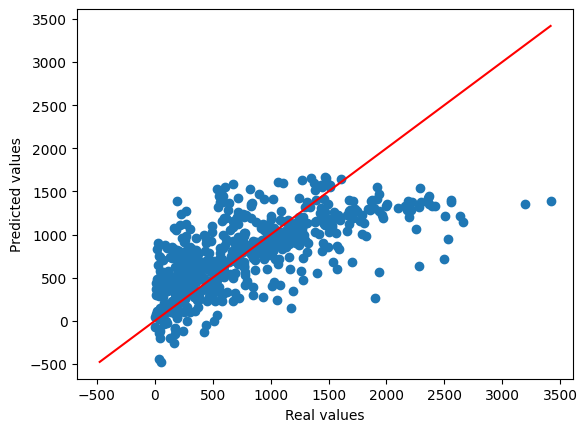

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs the estimated value with the best value of alpha for the training set.
s_ridge = ridge_best.predict(X_train_s)
plt.scatter(y_train_val,s_ridge)
p1 = max(max(s_ridge), max(y_train))
p2 = min(min(s_ridge), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r-')# pintar una función desde el punto [0,0] al [50,50]
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

###2.3.3 Linear Lasso Regression

> **Selecting the best value of alpha**

As previously, the first task is to obtain a reasonable value of `alpha` for the Lasso regressor.

In this assignment, the corresponding range that will be explored for `alpha` is: `[0.001, 0.01, 0.05, 0.1, 1, 5, 10]`. For each value of `alpha`, compute the $R^2$ for the validation set and plot all the metrics in the same figure.

*   First, import the package: from `sklearn.linear_model import Lasso`
*   Then, create the model object.
*   Next, fit the subtraining data. This creates a trained model (an object) of class regression.
*   Then, compute the $R^2$ for the validation data and keep it in a 1D array and plot it in a figure! Please, use log-scale in x-axis.



In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso

alpha = [0.001, 0.01, 0.05, 0.1, 1, 5, 10]
results= np.zeros(len(alpha))

for i in range(len(alpha)):
 L= Lasso(alpha[i]).fit(X_train_s,y_train_val)
 results[i] = L.score(X_val_s,y_val)
print(results)








[0.48234356 0.4823353  0.48229844 0.48225101 0.48132531 0.47671829
 0.47315075]


What is the best value for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE


> **Training and evaluating the model**

*   Now, create a model object.
*   Next, fit the training data with the best value of `alpha`.
*   Let us evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

RMSE: 500.73
R2: 0.47137565289029426


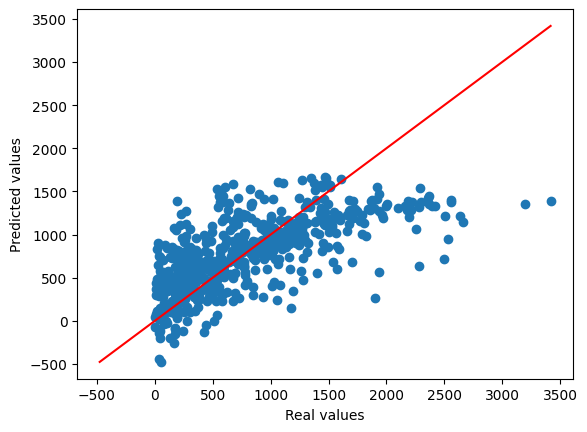

In [ ]:

# YOUR CODE HERE
from sklearn.linear_model import Lasso

alpha =1e-5
lasso_best= Lasso(alpha).fit(X_train_s,y_train_val)
lasso_pred = lasso_best.predict(X_test_s)


r2_lasso=lasso_best.score(X_test_s, y_test)
rmse_R = round(mean_squared_error(y_test, lasso_pred,squared=False),2)

print("RMSE:", rmse_R)
print("R2:", r2_lasso)



s_ridge = lasso_best.predict(X_train_s)
plt.scatter(y_train_val,s_ridge)
p1 = max(max(s_ridge), max(y_train))
p2 = min(min(s_ridge), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r-')# pintar una función desde el punto [0,0] al [50,50]
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

Having a look at the metrics reached by the three regression models explored (linear regression, Ridge regression and Lasso regression), would you think that there are outliers in the dataset? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE

### 2.3.4 Kernel Ridge Regression

> **Selecting the best values of alpha and gamma**

The kernel used is `rbf`. RBF kernels are the most generalized form of kernelization and are one of the most widely used kernels due to their similarity to the Gaussian distribution.


Therefore, the first task is to obtain a reasonable value of `alpha` and `gamma` for the Kernel Ridge regressor.

In this assignment the corresponding ranges that will be explored for `alpha` is: `[0.01, 0.1, 1, 1.25, 1.5, 1.75, 2]` and for `gamma`: `[0.01, 0.05, 0.1, 0.5, 1]`. For each value of `alpha` and `gamma`, compute the $R^2$ for the validation set.

*   First, import the package: from `sklearn.kernel_ridge import KernelRidge`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
*   Then, compute the $R^2$ for the validation data and keep it in a 2D array.



In [ ]:
# YOUR CODE HERE
from sklearn.kernel_ridge import KernelRidge
alpha_KernelRidge = [0.01, 0.1, 1, 1.25, 1.5, 1.75, 2]
gamma_KernelRidge = [0.01, 0.05, 0.1, 0.5, 1]
l_alpha = len(alpha_KernelRidge)
l_gamma = len(gamma_KernelRidge)
results_kr= np.zeros((l_alpha,l_gamma))

for i in range(len(alpha_KernelRidge)):
  for j in range(len(gamma_KernelRidge)):
    alpha_k = alpha_KernelRidge[i]
    gamma_k = gamma_KernelRidge[j]
    kr = KernelRidge(alpha=alpha_k,kernel="rbf", gamma=gamma_k)
    kr.fit(X_train_s, y_train_val)
    results_kr[i][j] = kr.score(X_val_s,y_val)
print(results_kr)



[[0.63218858 0.70738435 0.74991933 0.71003177 0.65040889]
 [0.5937275  0.68361271 0.71982477 0.76258384 0.69973313]
 [0.53266134 0.63292171 0.66921192 0.70613734 0.61238865]
 [0.52543594 0.62655956 0.66264059 0.6942328  0.58625063]
 [0.51914947 0.62109975 0.65700335 0.68315228 0.56106361]
 [0.51351337 0.61628517 0.65203456 0.67272826 0.53676362]
 [0.50835796 0.6119568  0.64757054 0.66284307 0.51328083]]


What is the best value for `gamma`? And for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
R2_KernelRidge_min = np.max(results_kr) #Buscamos valor max de la
pos = np.where(results_kr == R2_KernelRidge_min) #Buscamos su pos
print('The best  alpha is: ', alpha_KernelRidge[pos[0][0]]) #alpha en 0.0
print('The best  gamma is: ', gamma_KernelRidge[pos[1][0]])#gamma en 1.0

The best  alpha is:  0.1
The best  gamma is:  0.5


> **Training and evaluating the model**

*   Now, create a `Kernel Ridge Regression` model object.
*   Next, fit the training data with the best value of `alpha` and `gamma`
*   Let us evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
KR_best = KernelRidge(alpha=0.1,kernel="rbf", gamma=0.5)
KR_best.fit(X_train_s, y_train_val)
y_KR_best = KR_best.predict(X_test_s)
RMSE_lasso= round(mean_squared_error(y_test, y_KR_best, squared = False),2)
r2_kernel_ridge=KR_best.score(X_test_s,y_test)
print(r2_kernel_ridge)
print(RMSE_lasso)

0.7680570198454613
331.68


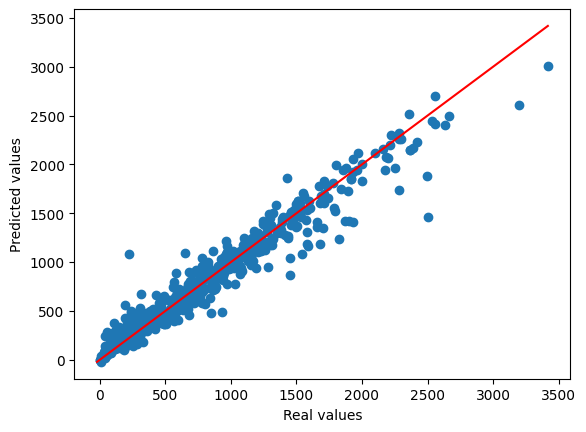

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs the estimated value with the best values of alpha and gamma for the training set
s_train_kernel_ridge = KR_best.predict(X_train_s)
plt.scatter(y_train_val,s_train_kernel_ridge)
p1 = max(max(s_train_kernel_ridge), max(y_train))
p2 = min(min(s_train_kernel_ridge), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

Is there any difference between this representation and those obtained for the other regressos explored in this assignment?

<font color = 'green'> YOUR ANSWER HERE

# <font color = 'black'> 3. Role of each variable in the model </font>

As it was explained in the master class, the coefficients represent the strength and direction of the relationship between the features and the target variable. If some coefficient is set to $0$ means that the corresponding feature has been excluded from the model.  

## 3.1. Linear regression case
In the linear regression case:
$$
f(\mathbf x) = \mathbf w^\top \mathbf x + w_0 = w_0 + \sum_{k=1}^d w_kx_k
$$each variable $x_k$ contribution to the predictive function is its value multiplied by the weight $w_k$.

Retrieve the coefficients of the  linear regressor in Section 2.3.1 and print the relevance of the features based on these weights.


In [ ]:
#YOUR CODE HERE   ##el regresor lineal da pesos negativos
#YOUR CODE HERE
relevance= lr.coef_
orden = np.argsort(np.absolute(relevance))


for ii in orden:
  print('[i:',ii,']', 'Variable: ', feature_names[ii], 'relevancia: ', round(np.absolute(relevance[ii]),2))


[i: 8 ] Variable:  Snowfall (cm) relevancia:  5.43
[i: 3 ] Variable:  Wind speed (m/s) relevancia:  5.51
[i: 4 ] Variable:  Visibility (10m) relevancia:  21.07
[i: 1 ] Variable:  Temperature(C) relevancia:  27.25
[i: 7 ] Variable:  Rainfall(mm) relevancia:  52.13
[i: 6 ] Variable:  Solar Radiation (MJ/m2) relevancia:  61.13
[i: 0 ] Variable:  Hour relevancia:  200.88
[i: 2 ] Variable:  Humidity(%) relevancia:  280.44
[i: 5 ] Variable:  Dew point temperature(C) relevancia:  371.3


What is the most relevante feature? And the least one?

<font color = 'green'> YOUR ANSWER HERE


In [ ]:
## la mas relevante es la humedad ( 371.3 )

## 3.2 Regression models with the best feature

### 3.2.1 Linear regression

Based on the previous results, **select the most important feature** and train and evaluate a linear regression model using only this feature.

Then, evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
#YOUR CODE HERE
most_imp_feature = np.array([5])
X_train_reduced = X_train_s[:, most_imp_feature]
X_test_reduced = X_test_s[:, most_imp_feature]


In [ ]:
#YOUR CODE HERE
mif_lr = LinearRegression().fit(X_train_reduced, y_train_val)
perd_mif = mif_lr.predict(X_test_reduced)
print(y_train_val.shape)

(611,)


0.13237458057500018
641.5


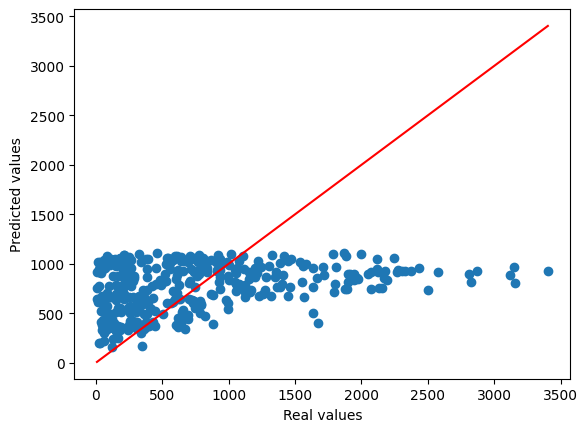

In [ ]:
#YOUR CODE HERE

r2_best_feature=mif_lr.score(X_test_reduced,y_test)
print(r2_best_feature)
mse_lr_best = round(mean_squared_error(y_test, perd_mif,squared=False),2)
print(mse_lr_best)


plt.scatter(y_test,perd_mif)
p1 = max(max(perd_mif), max(y_test))
p2 = min(min(perd_mif), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

### 3.2.2 Semi-linear regression with the best feature

What happens if we use a semi-linear regression model with a quadratic function?
$$
f(x)= w_0 + w_1 x + w_2 x^2
$$

where $x$ represents the observed variable ($-$ best feature in this assignment).


Train and evaluate a model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

(611, 2)
R2: 0.16
RMSE: 631.94


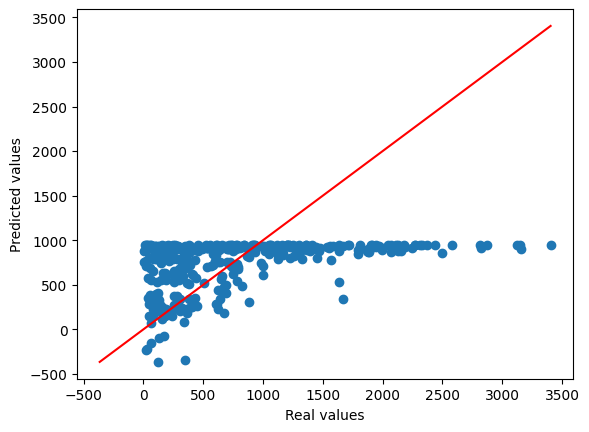

In [ ]:
#YOUR CODE HERE
X_quadratic_train = np.hstack((X_train_reduced ,X_train_reduced **2))

print(X_quadratic_train.shape)

model = LinearRegression()
model.fit(X_quadratic_train, y_train_val)

#evaluo
X_test_quadratic = np.hstack((X_test_reduced, X_test_reduced ** 2))
y_pred_quadratic = model.predict(X_test_quadratic)


r2_semi_linear = model.score(X_test_quadratic, y_test)
rmse= round(mean_squared_error(y_test, y_pred_quadratic, squared = False),2)

print(f"R2: {r2_semi_linear:.2f}")
print(f"RMSE: {rmse:.2f}")


plt.scatter(y_test,y_pred_quadratic)
p1 = max(max(y_pred_quadratic), max(y_test))
p2 = min(min(y_pred_quadratic), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

## <font color = 'black'> 3.3 Coefficients of Lasso Regression </font>

In Lasso regression, some of the coefficients will be set to $0$, which means that the corresponding feature has been excluded from the model. The non-zero coefficients represent the features that are most important for predicting the target variable.

Extend the features of the train and test subsets to products of some of the original columns to construct a polynomial function of the original features.

In `scikit-learn`, there is a module called [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that allows to create the polynomial expansion of the columns up to a certain degree. In this assignment, the hyperparameter `degree` is set to $2$.

In [ ]:
#YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_s)
X_test_poly = poly.fit_transform(X_test_s)


Now, how many features are there in training and test sets, respectively?

In [ ]:
#YOUR CODE HERE
print(f"Number of features in the training set: {X_train_poly.shape}")
print(f"Number of features in the test set: {X_test_poly.shape}")


Number of features in the training set: (611, 54)
Number of features in the test set: (375, 54)


Are all of them important for the regression task?

Use a `Lasso` regressor to find out the regression model in the new feature space determined by the polynomial expansion of the columns. For this task, the hyperparameter `alpha` is set to $0.5$.

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_poly, y_train_val)

# Check if there are any coefficients equal to 0
zero_coefs = np.sum(lasso.coef_ == 0)
print(f"Number of coefficients set to zero by Lasso: {zero_coefs}")


Number of coefficients set to zero by Lasso: 13


Is there any coefficient equal to $0$?

<font color = 'green'> YOUR ANSWER HERE


In [ ]:
#YOUR CODE HERE


Calculate the $R^2$ and RMSE metrics (over the "new" test set) and print out the results. Please, round any number off to 2 places.

Lasso R2: 0.60
Lasso RMSE: 434.88


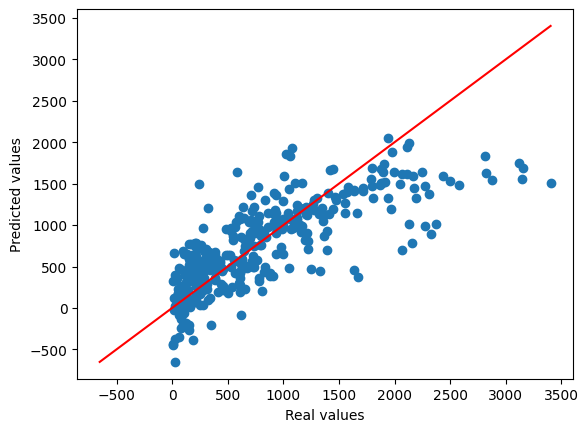

In [ ]:
#YOUR CODE HERE
y_pred_lasso = lasso.predict(X_test_poly)

r2_lasso_poly = lasso.score(X_test_poly, y_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso R2: {r2_lasso_poly:.2f}")
print(f"Lasso RMSE: {rmse_lasso:.2f}")




plt.scatter(y_test,y_pred_lasso)
p1 = max(max(y_pred_lasso), max(y_test))
p2 = min(min(y_pred_lasso), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

Finally, implement a linear regression model for the extended train and test subsets. Compute both $R^2$ and RMSE metrics and check if there is any coefficient in this model equal to zero.

Linear Model R2: -0.20
Linear Model RMSE: 754.10


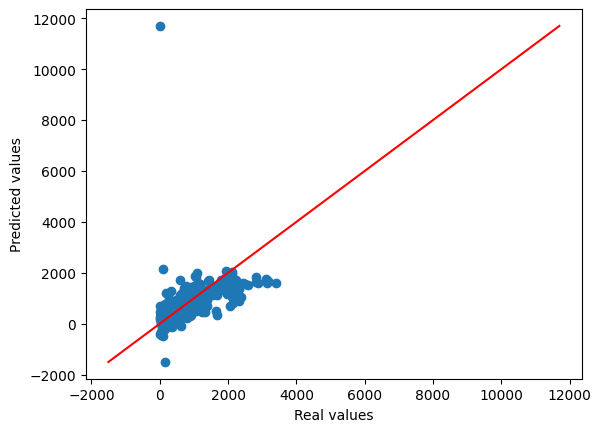

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression

X_train_poly = poly.fit_transform(X_train_s)
X_test_poly = poly.fit_transform(X_test_s)

linear_model_poly = LinearRegression().fit(X_train_poly, y_train_val)


y_pred_linear_poly = linear_model_poly.predict(X_test_poly)

r2_linear_poly = linear_model_poly.score(X_test_poly, y_test)
rmse_linear_poly = np.sqrt(mean_squared_error(y_test, y_pred_linear_poly))

print(f"Linear Model R2: {r2_linear_poly:.2f}")
print(f"Linear Model RMSE: {rmse_linear_poly:.2f}")


plt.scatter(y_test,y_pred_linear_poly)
p1 = max(max(y_pred_linear_poly), max(y_test))
p2 = min(min(y_pred_linear_poly), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

#para que funcione el grafico



# <font color = 'black'> 4. Best regression model </font>

It has always been said that we understand faster when we visualize data. In this last section of the assginment, we will find out which regression model is the best fit for our data!

Represent, by using a barplot, the $R^2$ obtained by each regression model evaluated in this assignment (with its best hyperparameters) for the **test set**. Include also the values reached in Section 3.





[-0.19895227247129488, 0.13237458057500018, 0.1580357092958955, 0.47137565289029426, 0.47137635442381476, 0.4713763567457383, 0.6012717891690967, 0.7680570198454613]


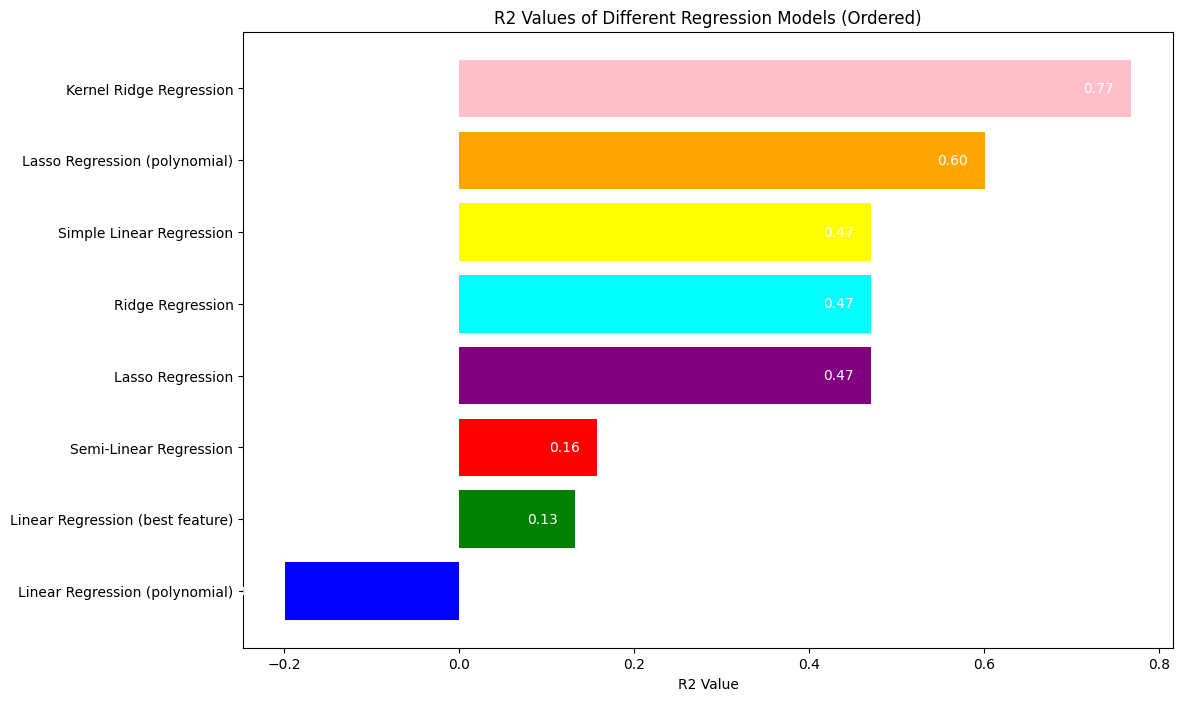

In [ ]:
#YOUR CODE HERE
import matplotlib.pyplot as plt

# Replace with the actual values
r2_values = {
    "Simple Linear Regression": r2_linear,
    "Linear Regression (best feature)": r2_best_feature,
    "Semi-Linear Regression": r2_semi_linear,
    "Lasso Regression (polynomial)": r2_lasso_poly,
    "Linear Regression (polynomial)": r2_linear_poly,
    "Ridge Regression": r2_ridge,
    "Kernel Ridge Regression": r2_kernel_ridge,
    "Lasso Regression": r2_lasso
}




#lo ordeno
sorted_r2 = dict(sorted(r2_values.items(), key=lambda item: item[1]))
names = list(sorted_r2.keys())
values = list(sorted_r2.values())

print(values)

plt.figure(figsize=(12, 8))
bars = plt.barh(names, values, color=['blue', 'green', 'red', 'purple', 'cyan', 'yellow', 'orange', 'pink'])
plt.xlabel('R2 Value')
plt.title('R2 Values of Different Regression Models (Ordered)')


for bar in bars:
    plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='right', color='white', fontsize=10)

plt.show()




Which regressor achieves the best $R^2$ coefficient?

<font color = 'green'> YOUR ANSWER HERE

### **This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now!**